## 【問題1】train_test_splitのスクラッチ  
>スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。
>
>sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation
>
>なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### scratch_train_test_split の作成

In [2]:
from decimal import Decimal, ROUND_HALF_UP

def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    # return none では戻り値をアンパック代入できないため予め引数用配列を用意
    X_train = np.empty(0)
    X_test = np.empty(0)
    y_train = np.empty(0)
    y_test = np.empty(0)
    
    if (type(X) is not np.ndarray)or(type(y) is not np.ndarray):
        print("ERROR: Xまたはyがndarrayではありません。")
    elif (X.ndim !=2)or(y.ndim !=1):
        print("ERROR: Xまたはyの次元が異なります。")
    else:
        # 入力データの行数
        X_row = X.shape[0]
        y_row = len(y)
        
        if not X_row == y_row:
            print("ERROR: Xとyの行数が違います。行数を合わせてください。")
        else:
            # trainの行数を計算。四捨五入するためにDecimal型に変換。
            train_row = Decimal(X_row*train_size)
            # 四捨五入した後、int型に戻す
            train_row = int(train_row.quantize(Decimal('0'), rounding=ROUND_HALF_UP))

            X_columns = X.shape[1]
            
            # concatenateを用いて２つのリストを列方向に結合する
            Xy_array = np.concatenate((X, y.reshape(-1,1)), axis=1)
            Xy_rand = np.random.permutation(Xy_array)
            
            X_train = Xy_rand[:train_row,:X_columns]
            X_test = Xy_rand[train_row:,:X_columns]
            y_train = Xy_rand[:train_row,X_columns]
            y_test = Xy_rand[train_row:,X_columns]
        
    return X_train, X_test, y_train, y_test

#### 検証：フィッシャーのアヤメデータセットを使用

In [3]:
# scikit-learn から　iris データセットを読み込む
from sklearn.datasets import load_iris

# iris データセットを変数に格納する
data = load_iris()

# 行と列のインデックス用のリストを用意
iris_data_columns=['sepal_length', 'sepal_width','petal_length','petal_width']
iris_target_columns=['Species',]

# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納
X = data['data']
y = data['target']

print("Xの形は：{}".format(X.shape))
print("Xの形は：{}".format(y.shape))
print("Xの次元は：{}".format(X.ndim))
print("yの次元は：{}".format(y.ndim))
print("X：\n{}".format(X))
print("y：\n{}".format(y))

Xの形は：(150, 4)
Xの形は：(150,)
Xの次元は：2
yの次元は：1
X：
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7. 

#### 作成したscratch_train_test_splitを使用して分割

In [4]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)

print("X_trainの形は：{}".format(X_train.shape))
print("y_trainの形は：{}".format(y_train.shape))
print("X_testの形は：{}".format(X_test.shape))
print("y_testの形は：{}".format(y_test.shape))

print("X_trainの次元は：{}".format(X_train.ndim))
print("y_trainの次元は：{}".format(y_train.ndim))
print("X_testの次元は：{}".format(X_test.ndim))
print("y_testの次元は：{}".format(y_test.ndim))

print("X_train：\n{}".format(X_train))
print("y_train：\n{}".format(y_train))
print("X_test：\n{}".format(X_test))
print("y_test：\n{}".format(y_test))


X_trainの形は：(120, 4)
y_trainの形は：(120,)
X_testの形は：(30, 4)
y_testの形は：(30,)
X_trainの次元は：2
y_trainの次元は：1
X_testの次元は：2
y_testの次元は：1
X_train：
[[6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [7.  3.2 4.7 1.4]
 [4.7 3.2 1.6 0.2]
 [5.7 3.8 1.7 0.3]
 [5.8 2.7 3.9 1.2]
 [4.9 2.5 4.5 1.7]
 [6.4 2.7 5.3 1.9]
 [6.5 3.2 5.1 2. ]
 [5.1 3.8 1.9 0.4]
 [6.1 2.6 5.6 1.4]
 [5.7 2.8 4.1 1.3]
 [6.1 2.8 4.7 1.2]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [6.2 2.8 4.8 1.8]
 [5.5 3.5 1.3 0.2]
 [5.6 3.  4.1 1.3]
 [6.3 2.3 4.4 1.3]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.1]
 [5.7 2.9 4.2 1.3]
 [4.9 3.1 1.5 0.1]
 [5.  3.5 1.3 0.3]
 [5.7 3.  4.2 1.2]
 [6.2 2.2 4.5 1.5]
 [6.9 3.1 5.4 2.1]
 [5.6 2.9 3.6 1.3]
 [7.2 3.  5.8 1.6]
 [5.7 4.4 1.5 0.4]
 [5.1 2.5 3.  1.1]
 [6.  2.2 5.  1.5]
 [6.3 2.7 4.9 1.8]
 [6.9 3.1 4.9 1.5]
 [6.  2.7 5.1 1.6]
 [5.  3.6 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.8 5.6 2.1]
 [5.8 2.7 5.1 1.9]
 [5.9 3.2 4.8 1.8]
 [4.9 2.4 3.3 1. ]
 [7.3 2.9 6.3 1.8]
 [6.8 2.8 4.8 1.4]
 [5.2 3.5 

#### 比較用にscikit-learnで分割を実施

In [5]:
from sklearn.model_selection import train_test_split

X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train_skの形は：{}".format(X_train_sk.shape))
print("y_train_skの形は：{}".format(y_train_sk.shape))
print("X_test_skの形は：{}".format(X_test_sk.shape))
print("y_test_skの形は：{}".format(y_test_sk.shape))

print("X_train_skの次元は：{}".format(X_train_sk.ndim))
print("y_train_skの次元は：{}".format(y_train_sk.ndim))
print("X_test_skの次元は：{}".format(X_test_sk.ndim))
print("y_test_skの次元は：{}".format(y_test_sk.ndim))

print("X_train_sk：\n{}".format(X_train_sk))
print("y_train_sk：\n{}".format(y_train_sk))
print("X_test_sk：\n{}".format(X_test_sk))
print("y_test_sk：\n{}".format(y_test_sk))


X_train_skの形は：(120, 4)
y_train_skの形は：(120,)
X_test_skの形は：(30, 4)
y_test_skの形は：(30,)
X_train_skの次元は：2
y_train_skの次元は：1
X_test_skの次元は：2
y_test_skの次元は：1
X_train_sk：
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [

#### エラーの検証

In [6]:
# テスト　：　ndarray以外の配列を入力してエラーメッセージを出力させる。
X_test_list = [[1,2,3,4],[5,6,7,8]]
y_test_list = [1,0,1,0]
print(type(X_test_list))
print(type(y_test_list))

X_train, X_test, y_train, y_test = scratch_train_test_split(X_test_list , y_test_list , train_size=0.8)

<class 'list'>
<class 'list'>
ERROR: Xまたはyがndarrayではありません。


In [7]:
# テスト　：　２次元以外のndarrayを入力してエラーを出力させる。
X_list = [[[1,2],[3,4]],[[1,2],[3,4]]]
y_list = [[1],[3]]
X_test_list = np.array(X_list)
y_test_list = np.array(y_list)

print("X_test_listの次元は：{}".format(X_test_list.ndim))
print("y_test_listの次元は：{}".format(y_test_list.ndim))

X_train, X_test, y_train, y_test = scratch_train_test_split(X_test_list , y_test_list , train_size=0.8)


X_test_listの次元は：3
y_test_listの次元は：2
ERROR: Xまたはyの次元が異なります。


## scikit-learnを用いて機械学習を行うコードを作成  
>scikit-learnを使ったコードを作成していきます。
>検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。



### 分類問題  
>分類は3種類の手法をスクラッチします。
>
>- ロジスティック回帰
>- SVM
>- 決定木
>
>ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。

>データセットは3種類用意します。
>
>1つ目は事前学習期間同様にirisデータセットです。
>
>2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。
>
>virgicolorとvirginica


>残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

## 【問題2】 分類問題を解くコードの作成  
>上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。



機械学習の流れは以下の通り。  
EDA → 前処理 → 学習 → 推定 →　評価 →　可視化  

「分類問題を解くコード」は以下の要件を満たすものを想定

- 前提
    - データセットに対してEDAは完了している
- 入力
    - ３種類のデータセット（特徴量とラベルに分割済み）
- 出力
    - 精度の評価値
- 処理
    - 学習データとテストデータに分割（上記の分割データ）
    - 標準化（３種類の学習データとテストデータ）
    - 学習（標準化したデータセットをscikit-learnのロジスティック回帰、SVM、決定木で学習）
    - 推定（３種類のデータセットに対して３つの手法による推定値を出力）
    - 評価（３種類のデータセットに対して３つの手法それぞれの精度（４種類の指標と混同行列）出力

**クラスを作成して上記の処理をメソッドとしてコードに落とし込む。**    

In [8]:
from decimal import Decimal, ROUND_HALF_UP

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

class SolveClassificationProblem():
    """
    分類問題を解くためのクラス

    Attributes
    ----------
    logistic1 : instance
        scikit-learnのSGDClassifierクラスのインスタンス
    logistic2 : instance
        scikit-learnのSGDClassifierクラスのインスタンス
    logistic3 : instance
        scikit-learnのSGDClassifierクラスのインスタンス
    svm1 : instance
        scikit-learnのSVCクラスのインスタンス
    svm2 : instance
        scikit-learnのSVCクラスのインスタンス
    svm3 : instance
        scikit-learnのSVCクラスのインスタンス
    tree1 : instance
        scikit-learnのDecisionTreeClassifierクラスのインスタンス
    tree2 : instance
        scikit-learnのDecisionTreeClassifierクラスのインスタンス
    tree3 : instance
        scikit-learnのDecisionTreeClassifierクラスのインスタンス
    mean1_ : 次の形のndarray, shape(n_features,)
        irisデータセットの学習データの平均
    mean2_ : 次の形のndarray, shape(n_features,)
        シンプルデータセット１の学習データの平均
    mean3_ : 次の形のndarray, shape(n_features,)
        シンプルデータセット２の学習データの平均
    var1_ : 次の形のndarray, shape(n_features,)
        irisデータセットの学習データの分散
    var2_ : 次の形のndarray, shape(n_features,)
        シンプルデータセット１の学習データの分散
    var3_ : 次の形のndarray, shape(n_features,)
        シンプルデータセット２の学習データの分散
    """
    def __init__(self):
       # ロジスティック回帰
        self.logistic1 = SGDClassifier(loss="log")# インスタンス化
        self.logistic2 = SGDClassifier(loss="log")# インスタンス化
        self.logistic3 = SGDClassifier(loss="log")# インスタンス化

        # SVM
        self.svm1 = SVC(gamma='auto')# インスタンス化
        self.svm2 = SVC(gamma='auto')# インスタンス化
        self.svm3 = SVC(gamma='auto')# インスタンス化

        #決定木
        self.tree1 = DecisionTreeClassifier(random_state=0)# インスタンス化
        self.tree2 = DecisionTreeClassifier(random_state=0)# インスタンス化
        self.tree3 = DecisionTreeClassifier(random_state=0)# インスタンス化
        
        print("ロジスティック回帰、SVM、決定木をインスタンス化しました。")
        print()
    
    
    
    def scratch_train_test_split(self, X, y, train_size=0.8):
        """
        検証データを分割する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, )
          正解値
        train_size : float (0<train_size<1)
          何割をtrainとするか指定

        Returns
        ----------
        X_train : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        X_test : 次の形のndarray, shape (n_samples, n_features)
          検証データ
        y_train : 次の形のndarray, shape (n_samples, )
          訓練データの正解値
        y_test : 次の形のndarray, shape (n_samples, )
          検証データの正解値
        """
        # return none では戻り値をアンパック代入できないため予め引数用配列を用意
        X_train = np.empty(0)
        X_test = np.empty(0)
        y_train = np.empty(0)
        y_test = np.empty(0)

        if (type(X) is not np.ndarray)or(type(y) is not np.ndarray):
            print("ERROR: Xまたはyがndarrayではありません。")
        elif (X.ndim !=2)or(y.ndim !=1):
            print("ERROR: Xまたはyの次元が異なります。")
        else:
            # 入力データの行数
            X_row = X.shape[0]
            y_row = len(y)

            if not X_row == y_row:
                print("ERROR: Xとyの行数が違います。行数を合わせてください。")
            else:
                # trainの行数を計算。四捨五入するためにDecimal型に変換。
                train_row = Decimal(X_row*train_size)
                # 四捨五入した後、int型に戻す
                train_row = int(train_row.quantize(Decimal('0'), rounding=ROUND_HALF_UP))

                X_columns = X.shape[1]

                # concatenateを用いて２つのリストを列方向に結合する
                Xy_array = np.concatenate((X, y.reshape(-1,1)), axis=1)
                # データセットをランダムに並べ替え
                Xy_rand = np.random.permutation(Xy_array)

                X_train = Xy_rand[:train_row,:X_columns]
                X_test = Xy_rand[train_row:,:X_columns]
                y_train = Xy_rand[:train_row,X_columns]
                y_test = Xy_rand[train_row:,X_columns]

        return X_train, X_test, y_train, y_test
    

    def fit(self, X):
        """
        標準化のために平均と標準偏差を計算する。

        Parameters
        ----------
        X : list(次の形のndarray, shape (n_samples, n_features)×３）
            ３種類の訓練データを入れたリスト
        """
        self.mean1_ = np.mean(X[0], axis=0)
        self.var1_ = np.var(X[0], axis=0)
        self.mean2_ = np.mean(X[1], axis=0)
        self.var2_ = np.var(X[1], axis=0)
        self.mean3_ = np.mean(X[2], axis=0)
        self.var3_ = np.var(X[2], axis=0)
        

    def transform(self, X):
        """
        fitで求めた値を使い標準化を行う。

        Parameters
        ----------
        X : list(次の形のndarray, shape (n_samples, n_features)×３）
            ３種類のデータセットの特徴量を入れたリスト

        Returns
        ----------
        X_scaled : list（次の形のndarray, shape (n_samples, n_features)×３）
            ３種類の標準化された特緒量を入れたリスト
        """
        # z =（x - u）/ s　　（X - 平均）/標準偏差
        standard1 = np.sqrt(self.var1_)
        X_scaled1 = (X[0] - self.mean1_)/standard1
        
        standard2 = np.sqrt(self.var2_)
        X_scaled2 = (X[1] - self.mean2_)/standard2
        
        standard3 = np.sqrt(self.var3_)
        X_scaled3 = (X[2] - self.mean3_)/standard3
        
        X_scaled = [X_scaled1, X_scaled2, X_scaled3]
        
        return X_scaled
    

    def machine_learning_predict(self, X_train_scaled, y_train, X_test_scaled):
        """
        学習（３つのデータセットをscikit-learnのロジスティック回帰、SVM、決定木で学習）
        推定（３種類のデータセットに対して３つの手法による推定値を出力）
        
        Parameters
        ----------
        X_train_scaled : list(次の形のndarray, shape (n_samples, n_features)×３）
            学習用の特徴量データ（３種類）
        y_train : list(次の形のndarray, shape (n_samples,)×３）
            学習用の正解データ（３種類）
        X_test_scaled : list(次の形のndarray, shape (n_samples, n_features)×３）
            テスト用の特徴量データ（３種類）

        Returns
        ----------
        y_pred_l : list(次の形のndarray, shape (n_samples,)×３）
            ロジスティック回帰による予測値（３種類）
        y_pred_s : list(次の形のndarray, shape (n_samples,)×３）
            SVMによる予測値（３種類）
        y_pred_t : list(次の形のndarray, shape (n_samples,)×３）
            決定木による予測値（３種類）
        """
        # ロジスティック回帰
        y_pred_l = []
        self.logistic1.fit(X_train_scaled[0], y_train[0])
        y_pred_l1 = self.logistic1.predict(X_test_scaled[0])
        self.logistic2.fit(X_train_scaled[1], y_train[1])
        y_pred_l2 = self.logistic2.predict(X_test_scaled[1])
        self.logistic3.fit(X_train_scaled[2], y_train[2])
        y_pred_l3 = self.logistic3.predict(X_test_scaled[2])
        y_pred_l = [y_pred_l1, y_pred_l2, y_pred_l3]

        # SVM
        y_pred_s = []
        self.svm1.fit(X_train_scaled[0], y_train[0])
        y_pred_s1 = self.svm1.predict(X_test_scaled[0])
        self.svm2.fit(X_train_scaled[1], y_train[1])
        y_pred_s2 = self.svm2.predict(X_test_scaled[1])
        self.svm3.fit(X_train_scaled[2], y_train[2])
        y_pred_s3 = self.svm3.predict(X_test_scaled[2])
        y_pred_s = [y_pred_s1, y_pred_s2, y_pred_s3]

        #決定木
        y_pred_t = []
        self.tree1.fit(X_train_scaled[0], y_train[0])
        y_pred_t1 = self.tree1.predict(X_test_scaled[0])
        self.tree2.fit(X_train_scaled[1], y_train[1])
        y_pred_t2 = self.tree2.predict(X_test_scaled[1])
        self.tree3.fit(X_train_scaled[2], y_train[2])
        y_pred_t3 = self.tree3.predict(X_test_scaled[2])
        y_pred_t = [y_pred_t1, y_pred_t2, y_pred_t3]
        
        return y_pred_l, y_pred_s, y_pred_t
        
        
    def evaluation(self, y_test, y_pred_l, y_pred_s, y_pred_t):
        """
        評価（３種類のデータセットに対して３つの手法それぞれの精度（４種類の指標）出力
        
        Parameters
        ----------
        y_test : list(次の形のndarray, shape (n_samples,)×３）
            テスト用データのラベル（３種類）
        y_pred_l : list(次の形のndarray, shape (n_samples,)×３）
            ロジスティック回帰による予測値（３種類）
        y_pred_s : list(次の形のndarray, shape (n_samples,)×３）
            SVMによる予測値（３種類）
        y_pred_t : list(次の形のndarray, shape (n_samples,)×３）
            決定木による予測値（３種類）
        Returns
        ----------
        none
        """

        # 行と列のインデックス用のリストを用意
        m_l = ['LogisticRegression', 'SVM', 'DecisionTree']
        data_columns=['Model', 'Accuracy（正解率）', 'Precision（適合率）', 'Recall（再現率）', 'F値' ]
        
        data_sets = ['フィッシャーのアヤメ', 'シンプルデータセット1', 'シンプルデータセット2']
        
        #Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値
        for d in range(3):
            verification_result = []
            
            verification = [m_l[0]]
            verification.append(accuracy_score(y_test[d], y_pred_l[d]))
            verification.append(precision_score(y_test[d], y_pred_l[d]))
            verification.append(recall_score(y_test[d], y_pred_l[d]))
            verification.append(f1_score(y_test[d], y_pred_l[d]))
            verification_result.append(verification)
            
            verification = [m_l[1]]
            verification.append(accuracy_score(y_test[d], y_pred_s[d]))
            verification.append(precision_score(y_test[d], y_pred_s[d]))
            verification.append(recall_score(y_test[d], y_pred_s[d]))
            verification.append(f1_score(y_test[d], y_pred_s[d]))
            verification_result.append(verification)

            verification = [m_l[2]]
            verification.append(accuracy_score(y_test[d], y_pred_t[d]))
            verification.append(precision_score(y_test[d], y_pred_t[d]))
            verification.append(recall_score(y_test[d], y_pred_t[d]))
            verification.append(f1_score(y_test[d], y_pred_t[d]))
            verification_result.append(verification)
            
            # pandas のデータフレームにする
            df_verification = pd.DataFrame(data=verification_result, columns=data_columns)
            print("{}の機械学習の結果は：".format(data_sets[d]))
            display(df_verification)
            print()
        

    def auto(self, X1, y1, X2, y2, X3, y3,train_size=0.8):
        """
        学習（標準化したデータセットをscikit-learnのロジスティック回帰、SVM、決定木で学習）
        推定（３種類のデータセットに対して３つの手法による推定値を出力）
        
        Parameters
        ----------
        X1, X2, X3: 次の形のndarray, shape (n_samples, n_features)
            3種類のデータセットの特徴量
        y1, y2, y3: 次の形のndarray, shape (n_samples,)
            3種類のデータセットのラベルデータ
        
        Returns
        ----------
        none
        """
        X1_train, X1_test, y1_train, y1_test = self.scratch_train_test_split(X1, y1, train_size=train_size)
        X2_train, X2_test, y2_train, y2_test = self.scratch_train_test_split(X2, y2, train_size=train_size)
        X3_train, X3_test, y3_train, y3_test = self.scratch_train_test_split(X3, y3, train_size=train_size)

        # 標準化
        X_train_list = [X1_train, X2_train, X3_train]
        self.fit(X_train_list)
        
        X_test_list = [X1_test, X2_test, X3_test]
        X_train_scaled = self.transform( X_train_list)
        X_test_scaled = self.transform(X_test_list)
        
        # 学習と予測
        y_train = [y1_train, y2_train, y3_train]
        y_pred_l, y_pred_s, y_pred_t = self.machine_learning_predict(X_train_scaled, y_train, X_test_scaled)
        
        # 評価
        y_test = [y1_test, y2_test, y3_test]
        self.evaluation(y_test, y_pred_l, y_pred_s, y_pred_t)
        
        
        

### データセット読み込み・作成

#### フィッシャーのアヤメ

In [9]:
# pandas のデータフレームにする
X_data = pd.DataFrame(data=data['data'], columns=iris_data_columns)
y_data = pd.DataFrame(data=data['target'], columns=iris_target_columns)

# Xとyを列方向に結合
df = pd.concat([X_data, y_data], axis=1)

# 条件に従って抜き出し
df_ex = df[df['Species'] >=1]

X = np.array(df_ex[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(df_ex['Species'])

# 処理用
X_iris = X
y_iris = y

print(X_iris)
print(y_iris)

[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.4 2.9 4.3 1.3]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.9 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.6 3.  4.1 1.3]
 [5.5 2.5 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.

#### データセット１

In [10]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

# 処理用
X_ds1 = X
y_ds1 = y

In [11]:
# ラベルの値を確認
print("シンプルデータセット1のラベルは: {}".format(np.unique(y_ds1)))

シンプルデータセット1のラベルは: [-1  1]


In [12]:
#グラフ用のデータフレームを用意
X_1 = pd.DataFrame(X_ds1)
y_1 = pd.DataFrame(y_ds1)

# Xとyを列方向に結合
df_1 = pd.concat([X_1, y_1], axis=1)

# ラベルごとに抜き出し
df_1a = df_1[df_1.iloc[:,2] ==-1]
df_1b = df_1[df_1.iloc[:,2] ==1]
display(df_1a)
display(df_1b)

,0,1,0
0,0.772383,-2.291673,-1
6,3.997710,1.251640,-1
7,2.156045,-0.385824,-1
8,1.947416,-1.296390,-1
9,1.587574,-1.859892,-1
...,...,...,...
492,1.297671,-0.645532,-1
493,2.160441,-0.149708,-1
494,1.665733,-2.031806,-1
495,1.248144,-2.167980,-1


,0,1,0
1,-0.593349,1.667883,1
2,-2.076486,0.487468,1
3,0.119227,3.625380,1
4,-3.130006,-0.156732,1
5,-1.781098,1.222249,1
...,...,...,...
490,-0.258877,3.259894,1
491,0.001821,4.235599,1
496,-2.610585,0.739247,1
497,0.317317,2.225520,1


#### データセット2

In [13]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


# 処理用
X_ds2 = X
y_ds2 = y

In [14]:
# ラベルの値を確認
print("シンプルデータセット1のラベルは: {}".format(np.unique(y_ds2)))

シンプルデータセット1のラベルは: [0 1]


In [15]:
#グラフ用のデータフレームを用意
X_2 = pd.DataFrame(X_ds2)
y_2 = pd.DataFrame(y_ds2)

# Xとyを列方向に結合
df_2 = pd.concat([X_2, y_2], axis=1)

# ラベルごとに抜き出し
df_2a = df_2[df_2.iloc[:,2] ==0]
df_2b = df_2[df_2.iloc[:,2] ==1]
display(df_2a)
display(df_2b)

,0,1,0
0,-0.44699,-2.80730,0
1,-1.46210,-2.45860,0
2,0.10645,1.92420,0
3,-3.59440,-4.01120,0
4,-0.98880,4.57180,0
5,-3.16250,-3.96060,0
6,0.56421,0.72888,0
7,-0.60216,8.46360,0
8,-0.61251,-0.75345,0
9,-0.73535,-2.27180,0


,0,1,0
20,-1.994800,-1.392700,1
21,0.350840,-0.031994,1
22,0.967650,7.892900,1
23,-1.281000,15.682400,1
24,0.967650,10.083000,1
25,1.376300,1.334700,1
26,-2.234000,-2.532300,1
27,-2.945200,-1.821900,1
28,0.146540,-0.287330,1
29,0.546100,5.824500,1


### データの確認

#### フッシャーのアヤメ

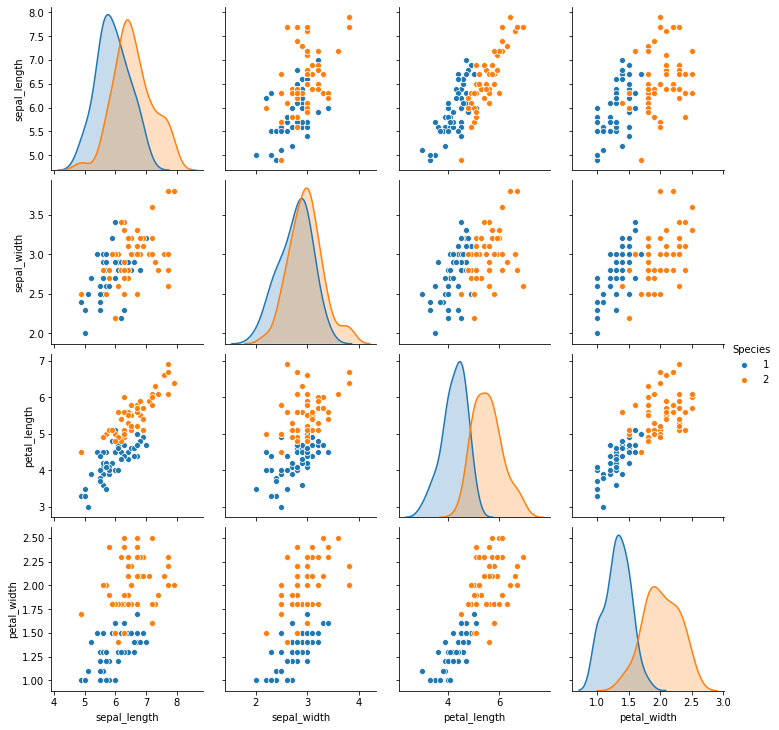

In [16]:
sns.pairplot(df_ex, hue='Species')

#### データセット１

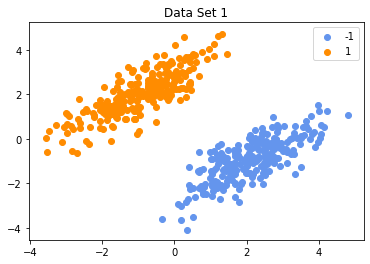

In [17]:
plt.title('Data Set 1')
# 散布図の作成　ラベル　-1
plt.scatter(df_1a.iloc[:,0],df_1a.iloc[:,1], c="cornflowerblue", label="-1")
# 散布図の作成　ラベル　1
plt.scatter(df_1b.iloc[:,0],df_1b.iloc[:,1], c="darkorange", label="1")
plt.legend()

#### データセット2

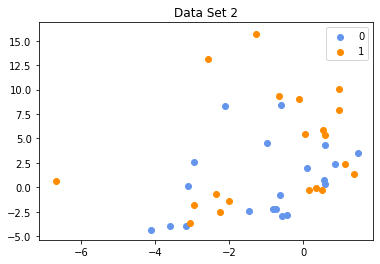

In [18]:
plt.title('Data Set 2')
# 散布図の作成　ラベル　-1
plt.scatter(df_2a.iloc[:,0],df_2a.iloc[:,1], c="cornflowerblue", label="0")
# 散布図の作成　ラベル　1
plt.scatter(df_2b.iloc[:,0],df_2b.iloc[:,1], c="darkorange", label="1")
plt.legend()

### 機械学習の実行

In [19]:
# 引数データの用意
X1 = X_iris
y1 = y_iris
X2 = X_ds1
y2 = y_ds1
X3 = X_ds2
y3 = y_ds2

In [20]:
# 作成したクラスのインスタンス化
classification = SolveClassificationProblem()
# 機械学習の実行
classification.auto(X1, y1, X2, y2, X3, y3,train_size=0.8)

ロジスティック回帰、SVM、決定木をインスタンス化しました。

フィッシャーのアヤメの機械学習の結果は：


,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,LogisticRegression,0.90,0.9,0.9,0.900000
1,SVM,0.95,1.0,0.9,0.947368
2,DecisionTree,0.95,1.0,0.9,0.947368



シンプルデータセット1の機械学習の結果は：


,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,LogisticRegression,1.0,1.0,1.0,1.0
1,SVM,1.0,1.0,1.0,1.0
2,DecisionTree,1.0,1.0,1.0,1.0



シンプルデータセット2の機械学習の結果は：


,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,LogisticRegression,0.500,0.4,0.666667,0.50
1,SVM,0.625,0.5,0.333333,0.40
2,DecisionTree,0.750,0.6,1.000000,0.75


## 回帰問題  
>回帰は1種類をスクラッチします。
>
>- 線形回帰

>線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。
>
>データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。
>
>train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

## 【問題3】 回帰問題を解くコードの作成  
>線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

**クラスを作成して回帰問題の処理をメソッドとしてコードに落とし込む。**    

In [21]:
from decimal import Decimal, ROUND_HALF_UP

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import mean_squared_error

class SolveRegressionProblem():
    """
    分類問題を解くコード

    Attributes
    ----------
    logistic1 : instance
        scikit-learnのSGDClassifierクラスのインスタンス
    mean_ : 次の形のndarray, shape(n_features,)
        平均
    var_ : 次の形のndarray, shape(n_features,)
        分散
    """
    def __init__(self):
       # ロジスティック回帰
        self.logistic1 = SGDClassifier(loss="log")
        print("ロジスティック回帰をインスタンス化しました。")
        print()
    
    
    
    def scratch_train_test_split(self, X, y, train_size=0.8):
        """
        検証データを分割する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, )
          正解値
        train_size : float (0<train_size<1)
          何割をtrainとするか指定

        Returns
        ----------
        X_train : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        X_test : 次の形のndarray, shape (n_samples, n_features)
          検証データ
        y_train : 次の形のndarray, shape (n_samples, )
          訓練データの正解値
        y_test : 次の形のndarray, shape (n_samples, )
          検証データの正解値
        """
        # return none では戻り値をアンパック代入できないため予め引数用配列を用意
        X_train = np.empty(0)
        X_test = np.empty(0)
        y_train = np.empty(0)
        y_test = np.empty(0)

        if (type(X) is not np.ndarray)or(type(y) is not np.ndarray):
            print("ERROR: Xまたはyがndarrayではありません。")
        elif (X.ndim !=2)or(y.ndim !=1):
            print("ERROR: Xまたはyの次元が異なります。２次元のndarrayを入れてください。")
        else:
            # 入力データの行数
            X_row = X.shape[0]
            y_row = len(y)

            if not X_row == y_row:
                print("ERROR: Xとyの行数が違います。行数を合わせてください。")
            else:
                # trainの行数を計算。四捨五入するためにDecimal型に変換。
                train_row = Decimal(X_row*train_size)
                # 四捨五入した後、int型に戻す
                train_row = int(train_row.quantize(Decimal('0'), rounding=ROUND_HALF_UP))

                X_columns = X.shape[1]

                # concatenateを用いて２つのリストを列方向に結合する
                Xy_array = np.concatenate((X, y.reshape(-1,1)), axis=1)
                Xy_rand = np.random.permutation(Xy_array)

                X_train = Xy_rand[:train_row,:X_columns]
                X_test = Xy_rand[train_row:,:X_columns]
                y_train = Xy_rand[:train_row,X_columns]
                y_test = Xy_rand[train_row:,X_columns]

        return X_train, X_test, y_train, y_test
    
        
    def fit(self, X):
        """
        標準化のために平均と標準偏差を計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
        """
        self.mean_ = np.mean(X, axis=0)
        self.var_ = np.var(X, axis=0)

    def transform(self, X):
        """
        fitで求めた値を使い標準化を行う。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量

        Returns
        ----------
        X_scaled : 次の形のndarray, shape (n_samples, n_features)
            標準化された特緒量
        """
        # z =（x - u）/ s　　（X - 平均）/標準偏差
        standard = np.sqrt(self.var_)
        X_scaled = (X - self.mean_)/standard
        
        return X_scaled
    

    def machine_learning_predict(self, X_train_scaled, y_train, X_test_scaled):
        """
        学習（標準化したデータセットをscikit-learnのロジスティック回帰、SVM、決定木で学習）
        推定（３種類のデータセットに対して３つの手法による推定値を出力）
        
        Parameters
        ----------
        X_train_scaled : 次の形のndarray, shape (n_samples, n_features)
            学習用の特徴量データ
        y_train : 次の形のndarray, shape (n_samples,)
            学習用の正解データ
        X_test_scaled : 次の形のndarray, shape (n_samples, n_features)
            テスト用の特徴量データ

        Returns
        ----------
        y_pred_l : 次の形のndarray, shape (n_samples,)
            ロジスティック回帰による予測値
        """
        # ロジスティック回帰
        
        self.logistic1.fit(X_train_scaled, y_train)
        y_pred_l = self.logistic1.predict(X_test_scaled)
        
        return y_pred_l
        
        
    def evaluation(self, y_test, y_pred_l):
        """
        評価（平均二乗誤差）出力
        
        Parameters
        ----------
        y_test : 次の形のndarray, shape (n_samples,)
            テスト用データのラベル
        y_pred_l : 次の形のndarray, shape (n_samples,)
            ロジスティック回帰による予測値

        Returns
        ----------
        none
        """
        # 列のインデックス用のリストを用意
        data_columns=['Model', '平均二乗誤差']
        
        verification_result = []
        verification = ['LogisticRegression']
        verification.append(mean_squared_error(y_test, y_pred_l))
        verification_result.append(verification)   
            
        # pandas のデータフレームにする
        df_verification = pd.DataFrame(data=verification_result, columns=data_columns)
        print("House Pricesデータセットの機械学習の結果は：")
        display(df_verification)
        print()
        
        
    def auto(self, X1, y1,train_size=0.8):
        """
        学習（標準化したデータセットをscikit-learnのロジスティック回帰で学習）
        推定（ロジスティック回帰により学習したモデルによる推定値を出力）
        
        Parameters
        ----------
        X1: 次の形のndarray, shape (n_samples, n_features)
            データセットの特徴量
        y1: 次の形のndarray, shape (n_samples, )
            データセットのラベルデータ

        Returns
        ----------
        X_scaled : 次の形のndarray, shape (n_samples, n_features)
            標準化された特緒量
        return X_scaled
        """
        X1_train, X1_test, y1_train, y1_test = self.scratch_train_test_split(X1, y1, train_size=train_size)

        # 標準化
        self.fit(X1_train)
        
        X1_train_scaled = self.transform( X1_train)
        X1_test_scaled = self.transform(X1_test)
        
        
        # 学習と予測
        y_pred_l = self.machine_learning_predict(X1_train_scaled, y1_train, X1_test_scaled)
        
        # 評価
        self.evaluation(y1_test, y_pred_l)
        
        
        

### データセット読み込み

#### House Pricesデータセット

In [22]:
# データセットcsvをpandasに読み込む

csv_path_home = "./Kaggle_data/train.csv" # ファイル名（パス）を指定する
df_data_home = pd.read_csv(csv_path_home)

# 条件に従って抜き出し
df_X = df_data_home[['GrLivArea', 'YearBuilt']]
df_y = df_data_home['SalePrice']

df = pd.concat([df_X, df_y], axis=1)


# 処理用
X_home = np.array(df[['GrLivArea','YearBuilt']])
y_home = np.array(df['SalePrice'])

print(X_home)
print(y_home)

[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[208500 181500 223500 ... 266500 142125 147500]


### データの確認

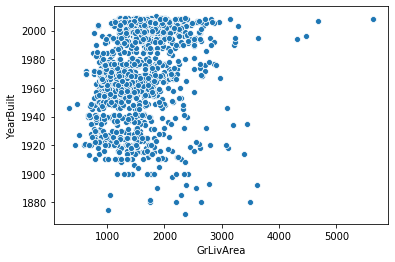

In [23]:
# 散布図の作成（特徴量同士）
sns.scatterplot(df['GrLivArea'], df['YearBuilt'])

### 機械学習の実行

In [27]:
# クラスのインスタンス化
classification = SolveRegressionProblem()
# 機械学習の実行
classification.auto(X_home, y_home,train_size=0.8)

ロジスティック回帰をインスタンス化しました。

House Pricesデータセットの機械学習の結果は：


,Model,平均二乗誤差
0,LogisticRegression,3.230388e+09


### 自作コードの検証  
過去の課題で作成したscikit-learnを用いたコードを使って同様の処理を行い、精度の比較を行う。

#### A.分類問題

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


deta_set_list = [[X_iris, y_iris],[X_ds1, y_ds1],[X_ds2, y_ds2]]
data_sets = ['フィッシャーのアヤメ', 'シンプルデータセット1', 'シンプルデータセット2']

# 事前課題等で作成したコードをループ
for m in range(3):

    X = deta_set_list[m][0]
    y = deta_set_list[m][1]

    # 学習データとテストデータを７５：２５で分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    # 標準化クラスをインスタンス化
    scaler = StandardScaler()

    # 配列Xの平均と分散を計算して記憶する
    scaler.fit(X_train)

    # 標準化
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #表示行数を１０行に設定
    np.set_printoptions(threshold=10)

    # 精度の一覧表用の空のリストを用意
    verification_result = []


    #ロジスティック回帰

    # 精度をまとめるための空のリストを用意
    verification_logistic = ['LogisticRegression']

    from sklearn.linear_model import SGDClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline
    logistic = SGDClassifier(loss="log")
    logistic.fit(X, y)
    y_pred_l = logistic.predict(X_test_scaled)
    #print("ロジスティック回帰による予測値\n{}".format(y_pred_l))

    #Accuracy（正解率）
    verification_logistic.append(accuracy_score(y_test, y_pred_l))

    #Precision（適合率）
    verification_logistic.append(precision_score(y_test, y_pred_l))

    #Recall（再現率）
    verification_logistic.append(recall_score(y_test, y_pred_l))

    #F値
    verification_logistic.append(f1_score(y_test, y_pred_l))



    #SVM

    # 精度をまとめるための空のリストを用意
    verification_svm = ['SVM']

    from sklearn.pipeline import make_pipeline
    from sklearn.svm import SVC

    svm = SVC(gamma='auto')# インスタンス化
    svm.fit(X_train_scaled, y_train)
    y_pred_s = svm.predict(X_test_scaled)
    #print("SVMによる予測値\n{}".format(y_pred_s))

    #Accuracy（正解率）
    verification_svm.append(accuracy_score(y_test, y_pred_s))

    #Precision（適合率）
    verification_svm.append(precision_score(y_test, y_pred_s))

    #Recall（再現率）
    verification_svm.append(recall_score(y_test, y_pred_s))

    #F値
    verification_svm.append(f1_score(y_test, y_pred_s))



    #決定木

    # 精度をまとめるための空のリストを用意
    verification_tree = ['DecisionTree']

    from sklearn.tree import DecisionTreeClassifier

    tree = DecisionTreeClassifier(random_state=0)# インスタンス化
    tree.fit(X_train_scaled, y_train)
    y_pred_t = tree.predict(X_test_scaled)
    #print("決定木による予測値\n{}".format(y_pred_t))

    #Accuracy（正解率）
    verification_tree.append(accuracy_score(y_test, y_pred_t))

    #Precision（適合率）
    verification_tree.append(precision_score(y_test, y_pred_t))

    #Recall（再現率）
    verification_tree.append(recall_score(y_test, y_pred_t))

    #F値
    verification_tree.append(f1_score(y_test, y_pred_t))




    # 表を作成するために計算結果を２次元配列にする
    verification_result = [
                verification_logistic, 
                verification_svm, 
                verification_tree
            ]

    # 行と列のインデックスようのリストを用意
    data_columns=['Model', 'Accuracy（正解率）', 'Precision（適合率）', 'Recall（再現率）', 'F値' ]

    # pandas のデータフレームにする
    df_verification = pd.DataFrame(data=verification_result, columns=data_columns)

    print(data_sets[m])
    display(df_verification)



フィッシャーのアヤメ


,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,LogisticRegression,0.90,0.833333,1.0,0.909091
1,SVM,0.90,1.000000,0.8,0.888889
2,DecisionTree,0.85,1.000000,0.7,0.823529


シンプルデータセット1


,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,LogisticRegression,1.00,1.000000,1.0,1.000000
1,SVM,1.00,1.000000,1.0,1.000000
2,DecisionTree,0.99,0.983607,1.0,0.991736


シンプルデータセット2


,Model,Accuracy（正解率）,Precision（適合率）,Recall（再現率）,F値
0,LogisticRegression,0.50,0.50,0.50,0.50
1,SVM,0.50,0.50,0.50,0.50
2,DecisionTree,0.75,0.75,0.75,0.75


#### B.回帰問題

In [29]:
# 検証用
X = X_home
y = y_home

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error


# 学習データとテストデータを７５：２５で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# 標準化クラスをインスタンス化
scaler = StandardScaler()

# 配列Xの平均と分散を計算して記憶する
scaler.fit(X_train)

# 標準化
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#表示行数を１０行に設定
np.set_printoptions(threshold=10)

logistic = SGDClassifier(loss="log")
logistic.fit(X, y)
y_pred_l = logistic.predict(X_test_scaled)

# 平均二乗誤差（Mean Squared Error, MSE）
print("平均二乗誤差（Mean Squared Error, MSE）: {}".format(mean_squared_error(y_test, y_pred_l)))



平均二乗誤差（Mean Squared Error, MSE）: 84017820047.64383


#### 検討結果

分類問題、回帰問題ともに、データの分割の仕方が異なることで若干結果が異なっていたが、  
分類問題においてシンプルデータセット２の精度が低い傾向にあることや、回帰問題の誤差が  
比較的近い値が出ているなど、類似した結果が出たため、問題なく作成できたと思われる。